# Syväoppiminen: Osa 1: Perseptroni

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Iina Pirinen'  # Oma nimesi
student_id = 'AB7766' # Oma opiskelijatunnuksesi JAMK:ssa

## Tehtävä 1-1
### Aihe: Onnellisuus, Luokittelija: Perseptroni (3 p)

Tutustu aineistoon *Somerville Happiness Survey Data Set* osoitteessa https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey .

Esikäsitellään aineisto. Tiedosto on UTF-16-enkoodattu.

In [2]:
# Esikäsittelyn Toteutus on kirjoitettu tässä tehtävässä valmiiksi
import pandas as pd

df = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
    'info-availability',
    'cost-of-housing',
    'quality-public-schools',
    'trust-in-local-police',
    'maintenance-of-streets',
    'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns

print(df['happy'].value_counts(), '\n')

# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

df

happy
1    77
0    66
Name: count, dtype: int64 

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


,happy,info-availability,cost-of-housing,quality-public-schools,trust-in-local-police,maintenance-of-streets,social-event-availability
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
138,0,5,3,3,1,3,5
139,1,5,2,3,4,2,5
140,1,5,3,3,4,4,5
141,0,4,3,3,4,4,5


Jaa  aineisto koulutus- (67%) ja testausaineistoon (33%) (`X_train`, `y_train`, `X_test`, `y_test`).
Käytä satunnaissiementä `9001`.

In [3]:
# Kirjoita toteutuksesi tähän soluun.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='happy')
y = df['happy']

# Ainesiton jako koulutus- ja testausaineistoon 67/33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

# Skaalataan
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_columns)

In [4]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Lineaarinen perseptroni-luokittelija

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Tallenna luokittelija `pc`-muuttujaan.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`. Vinkki: `decision_function()`.

3. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

4. Laske regressiolle ROC-arvot `scikit-learn`-kirjaston `metrics`-moduulin avulla. Laske myös ROC-käyrän alainen alue muuttujaa `auc`. Piirrä kynnysarvon optimointikäyrä `matplotlib`-kirjastolla.

5. Kirjoita `pohdinta`-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät.

In [5]:
# Kirjoita toteutuksesi tähän soluun.
from sklearn.linear_model import Perceptron

# Luo ja sovita Perceptron-malli
pc = Perceptron(alpha=0.01, penalty='l1', eta0=0.5, tol=0.0001, max_iter=100)

pc.fit(X_train, y_train)

# Ennusta luokat
y_pred = pc.predict(X_test)

# Ennusta todennäköisyyspisteet (luottamuspisteet)
y_score = pc.decision_function(X_test)

# Nämä vaan koska kiinnostaa miltä näyttää
print(y_pred)
print(y_score)


[1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 1 1]
[ 0.04243174 -1.61985907 -0.78871367 -0.78871367  0.04243174 -0.78871367
  0.04243174  0.04243174  0.04243174 -0.78871367  0.04243174 -0.78871367
  0.04243174 -0.78871367 -0.78871367 -1.61985907 -1.61985907 -0.78871367
 -0.78871367  0.04243174 -1.61985907 -1.61985907 -0.78871367 -1.61985907
 -0.78871367  0.04243174 -0.78871367 -0.78871367  0.04243174 -3.28214989
  0.04243174  0.04243174  0.04243174 -1.61985907  0.04243174  0.04243174
  0.04243174  0.04243174 -0.78871367 -0.78871367 -0.78871367  0.04243174
  0.04243174  0.04243174  0.04243174 -1.61985907  0.04243174  0.04243174]


In [6]:
# Kokeillaan GridSearchia parhaiden parametrien löytämiseksi

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': [None, 'l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'eta0': [0.1, 0.5, 1.0],
}

perceptron = Perceptron()

# Käytetään GridSearchCV:tä parhaiden hyperparametrien etsimiseen
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tulokset
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.01, 'eta0': 0.5, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.0001}


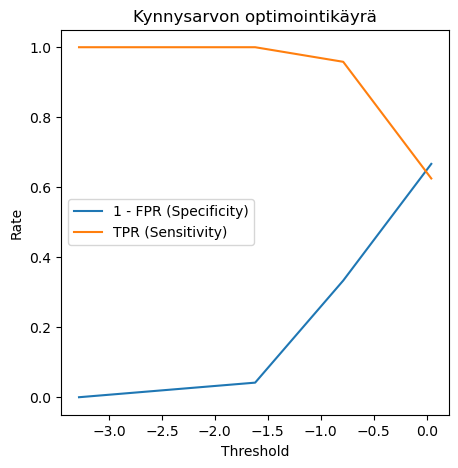

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = auc(fpr, tpr) # AUC

# Kynnysarvon optimointikäyrä
def fig2():
    plt.figure(figsize=(5, 5))
    plt.plot(thresholds, 1 - fpr, label='1 - FPR (Specificity)')
    plt.plot(thresholds, tpr, label='TPR (Sensitivity)')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('Kynnysarvon optimointikäyrä')
    plt.legend(loc='center left')
    plt.show()

# ROC käyrä
def fig():
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = {:.2f}'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC käyrä')
    plt.legend(loc='lower right')
    plt.show()

fig2()

In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.6458333333333334


In [9]:
# Pohdintaa.
pohdinta = "Pohdintaa alempana"

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.65      0.62      0.64        24

    accuracy                           0.65        48
   macro avg       0.65      0.65      0.65        48
weighted avg       0.65      0.65      0.65        48

Confusion matrix:
 [[16  8]
 [ 9 15]]
auc: 0.6953125000000001
Pohdinta: Pohdintaa alempana


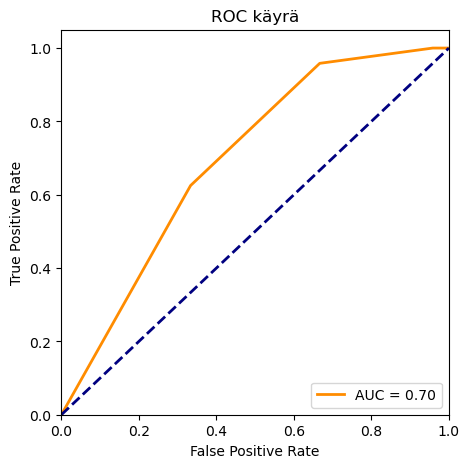

In [10]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla myös kaaviokuva.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Pohdinta: {pohdinta}')
fig()

### Muuta pohdintaa

**Luokat tarkemmin**

- happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)
- info-availability = the availability of information about the city services
- cost-of-housing = the cost of housing
- quality-public-schools = the overall quality of public schools
- trust-in-local-police = your trust in the local police
- maintenance-of-streets = the maintenance of streets and sidewalks 
- social-event-availability = the availability of social community events

Attributes other than 'happy' have values 1 to 5.

Vaikka happy -sarakkeen luokat eivät ole täysin tasapainossa, epätasapaino ei ole äärimmäistä.

**Luottamuspisteet**

Luottamuspisteet (confidence score): jatkuva arvo, joka edustaa mallin "luottamusta" tai "voimaa" määritettäessä tietty esiintymä tiettyyn luokkaan.

- Positiivinen luottamuspiste osoittaa, että esiintymän ennustetaan kuuluvan luokkaan 1.
- Negatiivinen luottamuspiste osoittaa, että esiintymän ennustetaan olevan luokkaa 0.

Mitä suurempi luottamuspisteen absoluuttinen arvo on, sitä varmempi malli on ennusteessaan. Esimerkiksi arvo (-3.28214989) osoittaa siihen, että esiintymä kuuluu luokkaan 0 (unhappy). Erittäin negatiivinen arvo viittaa korkeaan luottamustasoon. Tässä tapauksessa luokkaan 1 (happy) liittyvät ennusteet eivät saavuta korkeita luottamuspisteitä, mikä viittaa siihen, että malli on epävarmempi luokan 1 ennustamisessa.

**Classification report**
'
- Precision: Luokan 0 ennustetuista tapauksista 64% oli luokkaa 0 ja luokasta 1 65% oli luokkaa 1.
- Recall: Kaikista luokan 0 todellisista tapauksista malli tunnisti oikein 67% ja luokassa 1 62%.
- F1-Score: F1-pisteet huomioivat sekä vääriä positiivisia että vääriä negatiivisia. Korkeampi F1-pistemäärä osoittaa parempaa tasapainoa Precisionin ja Recallin välillä. Luokilla 0 ja 1 arvot olivat lähes samat (0: 0.65 ja 1: 0.64).

Hyperparametrien säätämisen jälkeen luokitteluraportista huomataan arvojen tasoittumista. Ennen hyperparametrien säätämistä precision, recall ja F1-scoressa oli suuret erot luokkien välillä, mutta nyt ne ovat tasoittuneet, mikä tarkoittaa sitä, että malli toimii nyt molemmissa luokissa suht tasaisesti. Vaikka hyperparametrien säätämisellä saatiin tarkkuutta nostettua 0.62:ta 0.65:een (sarkastinen wuhuu!), on tarkkuusarvo silti todella matala.

Eräs selittävä tekijä huonolle ennustamiskyvylle voi olla se, että onnellisuus ei riipu näistä tekijöistä mitä asukkailta on kysytty. Jos vaikka tarkastellaan dataframen (kuva alla) rivejä 2 ja 3, huomataan, että vaikka rivillä kolme asukas on ollut tyytyväisempi palveluihin, hän on silti ollut onneton, kun taas tyytymättömämpi asukas on kertonut olevansa onnellinen (olettaen, että kyselyssä 1=huono ja 5=hyvä). 

![](./df.png)


## Tehtävä 1-2

### Aihe: Uutisryhmien viestit, Luokittelija: Perseptroni (3 p)

- Fetch_20newsgroups-funktiota käytetään lataamaan 20 uutisryhmän tietojoukon koulutus- ja testausjoukot. Remove-parametria käytetään sulkemaan pois tietyt tekstin osat, kuten otsikot, alatunnisteet ja lainausmerkit.
- "fit_transform" käytetään harjoitustiedoissa sanaston oppimiseen ja harjoitustekstidatan "muuntamiseksi" dokumentti-termimatriisiksi.
- "transform" metodia käytetään sitten testitiedoissa sen muuntamiseksi samaksi dokumentti-termi-matriisiksi käyttämällä harjoitustiedoista opittua sanastoa.

**TfidfVectorizer**

1. TfidfVectorizer ottaa joukon tekstidokumentteja ja muuntaa ne harvaksi matriisiksi, jossa jokainen rivi vastaa asiakirjaa ja jokainen sarake vastaa uniikkia sanaa koko asiakirjakokoelmassa.

2. Tämän matriisin arvot edustavat kunkin asiakirjan jokaisen sanan TF-IDF-pisteitä. Sanoilla, jotka ovat yleisiä tietyssä asiakirjassa mutta harvinaisia koko kokoelmassa, on korkeammat TF-IDF-pisteet.

TfidfVectorizer onkin siis tärkeä apuväline luonnollisen kielen (natural language) käsittelyssä, koska se muuttaa tekstidatan koneoopimisalgoritmille ymmärrettävään muotoon (numeeriseksi).

Tässä tapauksessa siis
koulutujoukko: 1791 asiakirjaa, 18242 sanaa
testijoukko: 1192 asiakirjaa, 18242 sanaa

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: aseta valittavan testijoukon nimi (subset) ja kategoriat (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                              remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                             remove=('headers', 'footers', 'quotes'))

X_train,y_train = ng_train.data,ng_train.target
X_test,y_test = ng_test.data,ng_test.target

vectorizer = TfidfVectorizer()

# TODO: Muunna opetusaineisto fit_transform()-metodilla
X_train = vectorizer.fit_transform(X_train)

# TODO: Muunna myös testiaineisto transform()-metodilla
X_test = vectorizer.transform(X_test)

In [12]:
print(X_test.shape)
print(X_train.shape)

(1192, 18242)
(1791, 18242)


In [13]:
# Kirjoita toteutuksesi tähän soluun.
pc = Perceptron(random_state=12501)

pc.fit(X_train, y_train)

# Ennusta luokat
y_pred = pc.predict(X_test)

# Ennusta todennäköisyyspisteet (luottamuspisteet)
y_score = pc.decision_function(X_test)

cr1 = classification_report(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)

In [14]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(cm1)  # verrataan toteutuneita arvoja ennusteisin
print(cr1)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Muutamia kohokohtia:**

- Positiiviset ennusteet ovat 85-87% totta.
- Kohteen "rec.sport.hockey" malli tunnisti oikein 92 % todellisista "rec.sport.hockey" -tapauksista.
- Kohteessa "rec.sport.baseball" malli taltioi 78 % todellisista "rec.sport.baseball" -tapauksista, mikä on huomattavasti pienempi kuin "rec.sport.hockeyn" tunnistamat tapaukset.

Kaiken kaikkiaan malli näyttää suoriutuvan ihan ok tällä aineistolla.

Piirretään kuva sekaannusmatriisista

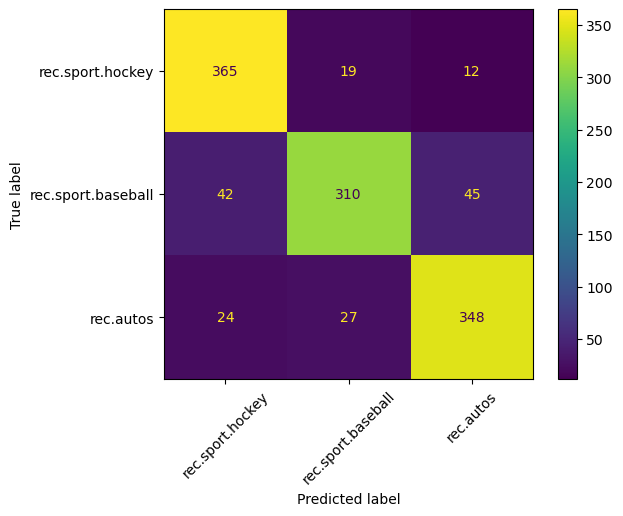

In [15]:
# TODO: sekaannusmatriisin piirtäminen

# Specify class labels
class_labels = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# Create ConfusionMatrixDisplay with custom labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)

# Plot the confusion matrix
cm_display.plot(cmap='viridis', values_format='d')

# Show the plot
plt.xticks(rotation=45)
plt.show()

**Todelliset positiiviset:**

Diagonaaliset elementit edustavat oikein luokiteltujen esiintymien määrää.

- 365 tapausta "rec.sport.hockey" luokassa luokiteltiin oikein.
- 310 "rec.sport.baseball" -tapausta luokiteltiin oikein.
- 348 "rec.autos" -tapausta luokiteltiin oikein.

**Virheelliset luokitukset:**

- 19 tapausta "rec.sport.hockey" luokassa luokiteltiin väärin "rec.sport.baseballiksi" ja 12 tapausta "rec.autoiksi".
- 42 tapausta "rec.sport.baseball" luokassa luokiteltiin väärin "rec.sport.hockeyksi" ja 45 "rec.autoiksi".
- 24 tapausta "rec.autos" luokassa luokiteltiin väärin "rec.sport.hockeyksi" ja 27 "rec.sport.baseballiksi".

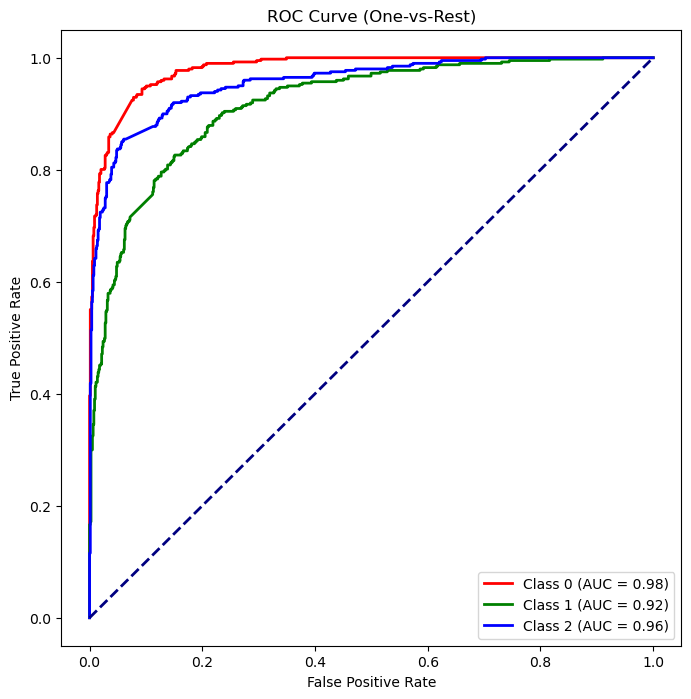

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Muuta labelit binäärisiksi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Laske kunkin luokan ROC-käyrä
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Piirretään käyrät
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']
for i, color in zip(range(len(categories)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

## Tehtävä 1-3 (2 p)
Toteuta sama myös toisella `categories_2` -kategorialistalla,

Pohdinta: Vertaa uutisryhmien opetustuloksia toisiinsa ja pohdi sanallisesti, että mistä mahdolliset erot tuloksissa johtuvat.

Huom! Tähänkin aineistoon (jos kiinnostaa enemmän) voit palata myöhemmin kurssin vapaaehtoisen harjoitustyön parissa.

In [17]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: aseta valittavan testijoukon nimi (subset) ja kategoriat (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2,
                             remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()

X_train,y_train = ng_train.data,ng_train.target
X_test,y_test = ng_test.data,ng_test.target

# TODO: Muunna opetusaineisto fit_transform()-metodilla
X_train = vectorizer.fit_transform(X_train)

# TODO: Muunna myös testiaineisto transform()-metodilla
X_test = vectorizer.transform(X_test)

print(X_test.shape)
print(X_train.shape)

# Kirjoita toteutuksesi tähän soluun.
pc = Perceptron(random_state=12501)

pc.fit(X_train, y_train)

# Ennusta luokat
y_pred = pc.predict(X_test)

# Ennusta todennäköisyyspisteet (luottamuspisteet)
y_score = pc.decision_function(X_test)

cr1 = classification_report(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)

(1178, 47529)
(1768, 47529)


In [18]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))  # verrataan toteutuneita arvoja ennusteisin
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.79084953 -0.54862678 -0.67818069]
 [-0.24036164 -0.5191811   0.02529202]
 [-0.27250296  0.18487685 -0.02065824]
 ...
 [ 0.38867009 -0.19169666 -0.59294443]
 [-0.68236023  0.88524358 -0.85308886]
 [-0.33076315  0.23788087 -0.61880495]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



Sekaannusmatriisin piirtäminen `categories_2` -datalla:

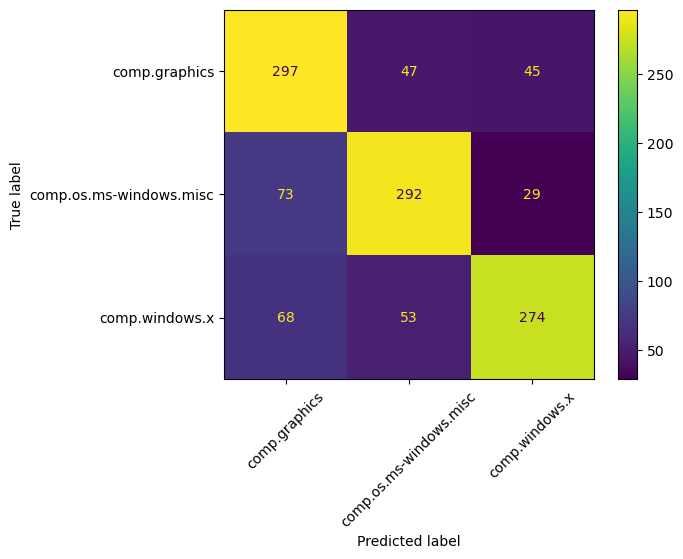

In [19]:
# TODO: sekaannusmatriisin piirtäminen

# Specify class labels
class_labels = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# Create ConfusionMatrixDisplay with custom labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)

# Plot the confusion matrix
cm_display.plot(cmap='viridis', values_format='d')

# Show the plot
plt.xticks(rotation=45)
plt.show()

Mahdollisia syitä mallin huonompaan suoriutumiseen näillä kategorioilla:

- Luokissa "comp.graphics", "comp.os.ms-windows.misc", "comp.windows.x" käytetty sanasto saattaa olla teknisempää tai erikoistuneempaa, ja se vaatii kehittyneemmän mallin tai enemmän harjoitustietoja, jotta vivahteet pystytään tunnistamaan.
- Toisen kategorian aiheet ovat kieleltään ja kontekstiltaan samankaltaisempia, joten mallin voi olla haastavaa erottaa ne toisistaan.

### Roc käyrät ja AUC pisteet

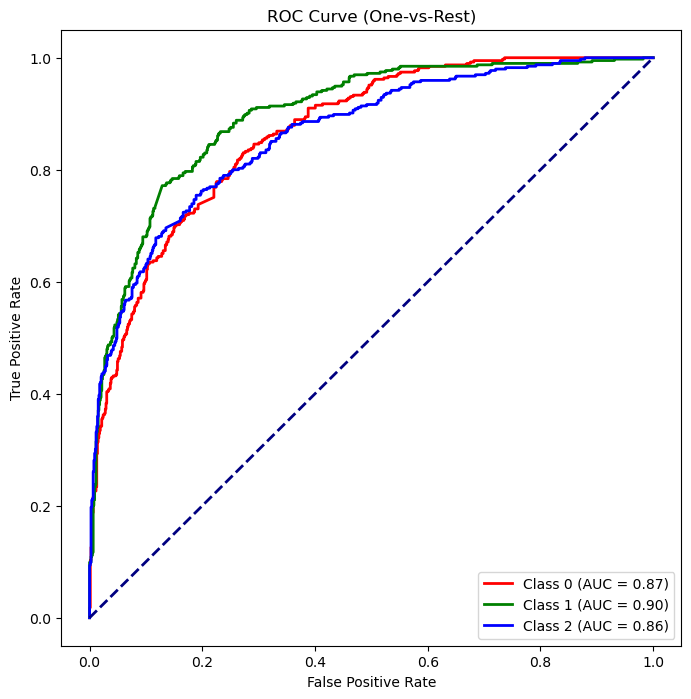

In [20]:
# Muuta labelit binäärisiksi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Laske kunkin luokan ROC-käyrä
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Piirretään käyrät
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']
for i, color in zip(range(len(categories)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()
